<div class="output_png output_subarea output_execute_result">
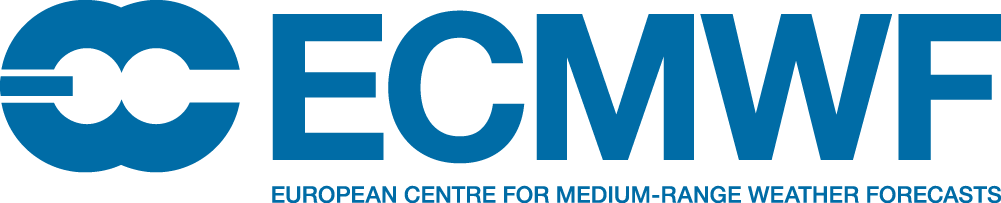
</div>

# Precipitation type

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://charts.ecmwf.int/products/medium-precipitation-type   


<div class="output_png output_subarea output_execute_result">
<center>
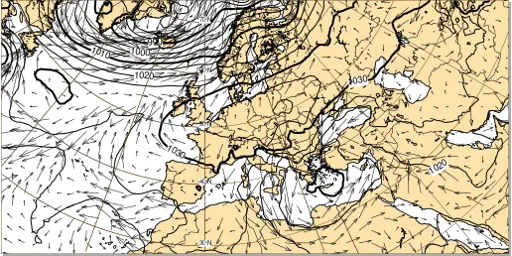
</div>

The full list of available Open data products can be found [here](https://www.ecmwf.int/en/forecasts/datasets/open-data), and more information can be found in the [User documentation](https://confluence.ecmwf.int/display/DAC/ECMWF+open+data%3A+real-time+forecasts+from+IFS+and+AIFS).  
This product takes in input following parameter :

* [Precipitation type](https://codes.ecmwf.int/grib/param-db/260015)

In this example, we will use: 
- [**ecmwf.opendata**](https://github.com/ecmwf/ecmwf-opendata) Client to download the data
- [**Metview**](https://metview.readthedocs.io/en/latest/) library to read, process and plot the data 

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [1]:
#!pip install ecmwf-opendata metview metview-python

In [2]:
import metview as mv
from ecmwf.opendata import Client

In [3]:
client = Client("ecmwf", beta=False)

In [4]:
parameters = ['ptype']
filename = 'medium-precipitation-type.grib'
filename

'medium-precipitation-type.grib'

In [5]:
client.retrieve(
    date=0,
    time=0,
    step=12,
    stream="oper",
    type="fc",
    levtype="sfc",
    param=parameters,
    target=filename
)

20241227000000-12h-oper-fc.grib2:   0%|          | 0.00/0.98M [00:00<?, ?B/s]

## Reading and processing the data
Now we can use **Metview's read() function** to read the files.

In [6]:
data = mv.read(filename)

The **describe()** function will give us the overview of the dataset. 

In [7]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
ptype,surface,0,20241227,0,12,None,260015,od,oper,fc,0001


And an overview of one parameter, where we can see more information, such as units or type of level.

In [8]:
data.describe('ptype')

shortName,ptype
name,Precipitation type
paramId,260015
units,(Code table 4.201)
typeOfLevel,surface
level,0
date,20241227
time,0
step,12
number,None
class,od


And finally, we can plot the data on the map. 

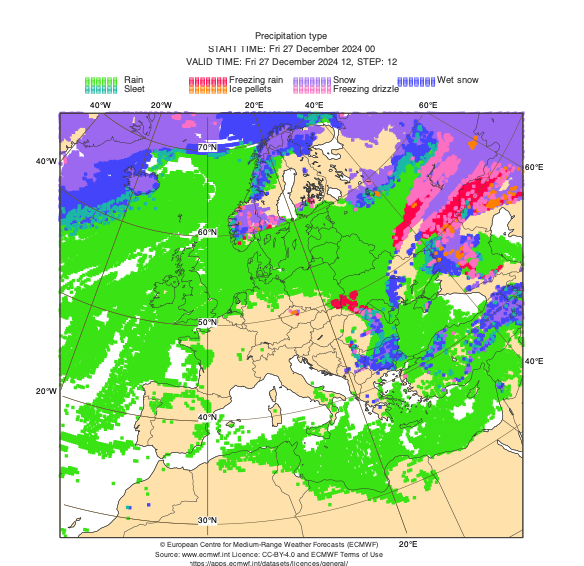

In [20]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="charcoal",
    map_coastline_resolution="medium",
    map_coastline_land_shade="on",
    map_coastline_land_shade_colour="cream",
    map_coastline_sea_shade="off",
    map_boundaries="on",
    map_boundaries_colour= "charcoal",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid_colour="tan",
    map_label_height=0.35,
)

# define view
view = mv.geoview(
    area_mode = "name",
    area_name = "europe",
    subpage_clipping = "off",
    coastlines = coast
)

#define styles
ptype_symbol = mv.mcont(
    contour = "off",
    contour_shade = "on",
    contour_shade_technique = "marker",
    contour_shade_colour_method  = "list",
    contour_shade_colour_table = ["RGB(0.23,0.89,0.08)", "none", "RGB(1.00,0.01,0.29)", "none", "lavender", "RGB(0.268,0.268,0.9793)", "turquoise", "orange", "none", "RGB(0.988,0.435,0.757)"],
    contour_shade_height_table = 0.25,
    contour_level_list              = [1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13],
    contour_level_selection_type    = "level_list",
    contour_shade_marker_table = 18,
    legend = "on"
)

legend = mv.mlegend(legend_display_type = "disjoint",
    legend_symbol_height_factor = 1,
    legend_text_colour = "charcoal",
    legend_text_font_size = "40%",
    legend_column_count     = 4,
    legend_text_composition = "user_text_only",
    legend_user_lines = ["Rain", "ignore", "Freezing rain", "ignore", "Snow", "Wet snow", "Sleet", "Ice pellets", "ignore", "Freezing drizzle"])
                                        
title = mv.mtext(
    text_lines=["Precipitation type", 
                "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' />", 
                "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' />, STEP: <grib_info key='step' />"],
    text_font_size=0.4,
    text_colour         = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines          = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                           "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                            "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 6.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, data, ptype_symbol, legend, title, ecmwf_text)

To generate the png file you can run the following cell.

In [23]:
png = mv.png_output(
      output_name = "medium-precipitation-type",   # specify relative or full path
      output_title = "medium-precipitation-type",    # title used by a viewer
      output_width = 1000,                 # set width in pixels
)
mv.setoutput(png)
mv.plot(view, data, ptype_symbol, legend, title, ecmwf_text)

Note that plot produced using open data dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
Open data is on 0.25x0.25 resolution, while high resolution data is 0.1x0.1 grid.